### RL Dynamic Programming Ex 4.9

Gambler's Problem

We are going to implement value iteration for the gambler’s problem and solve it for ph = 0.25 and ph = 0.55. In programming, we may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Our results are shown graphically below in the notebook.

We need to examine if our results are stable as Theta --> 0

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [34]:
def execute(ph=0.4, Theta=0.000001):
    # Probability ph = 0.40 as default and theta is almost closer to 0
    V = [0]*100
    for i in range(0, 100):
        V[i] = np.random.random() * 1000
    V[0] = 0
    pi = [0]*100
    counter = 1
    
    while True:
        Delta = 0
        for s in range(1, 100):  # For each state
            old_v = V[s]
            v = [0] * 51
            for a in range(1, min(s, 100 - s) + 1):
                v[a] = 0
                if a + s < 100:
                    v[a] += ph * (0 + V[s + a])
                    v[a] += (1 - ph) * (0 + V[s - a])
                elif a + s == 100:
                    v[a] += ph
                    v[a] += (1 - ph) * (0 + V[s - a])
            op_a = np.argmax(v)
            pi[s] = op_a
            V[s] = v[op_a]
            Delta = max(Delta, abs(old_v - V[s]))
        counter += 1
        
        if counter % 1000 == 0:
            print("Train loop: " + str(counter))
            print("Delta = " + str(Delta))
        
        if Delta < Theta: # continue until delta is less than theta, which is almost --> 0
            break
    
    return [V[1:100], pi[1:100]]


#### ph = 0.4

We consider this as the default solution to Gambler's problem that was provided to us.
We get below charts for our value estimates and final policy with regards to ph = 0.40

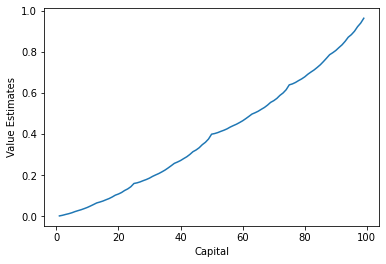

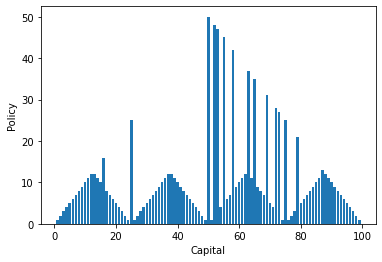

In [35]:
if __name__ == "__main__":
    [V1, pi1] = execute(ph=0.4)
    S = np.linspace(1, 99, num=99, endpoint=True)
    plt.figure()
    plt.plot(S, V1)
    plt.ylabel('Value Estimates')
    plt.xlabel('Capital')
    plt.show()
    plt.figure()
    plt.bar(S, pi1)
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.show()

#### ph = 0.25

We consider this as the default solution to Gambler's problem that was provided to us.
We get below charts for our value estimates and final policy with regards to ph = 0.25

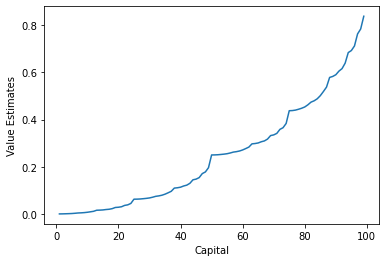

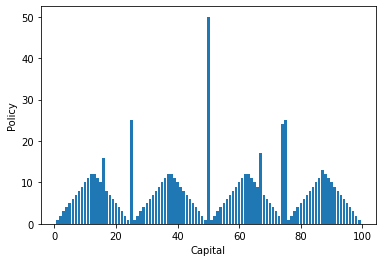

In [36]:
if __name__ == "__main__":
    [V2, pi2] = execute(ph=0.25)
    S = np.linspace(1, 99, num=99, endpoint=True)
    plt.figure()
    plt.plot(S, V2)
    plt.ylabel('Value Estimates')
    plt.xlabel('Capital')
    plt.show()
    plt.figure()
    plt.bar(S, pi2)
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.show()

#### ph = 0.55

We consider this as the default solution to Gambler's problem that was provided to us.
We get below charts for our value estimates and final policy with regards to ph = 0.55

Train loop: 1000
Delta = 0.2993439514792158
Train loop: 2000
Delta = 0.01112694216145993
Train loop: 3000
Delta = 0.00039551804309745364
Train loop: 4000
Delta = 8.671063468357332e-06


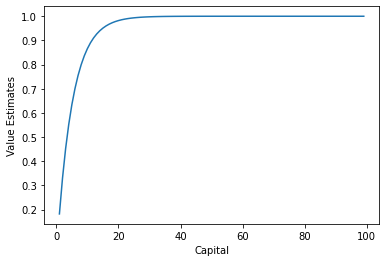

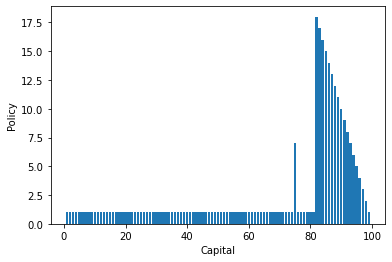

In [37]:
if __name__ == "__main__":
    [V3, pi3] = execute(ph=0.55)
    S = np.linspace(1, 99, num=99, endpoint=True)
    plt.figure()
    plt.plot(S, V3)
    plt.ylabel('Value Estimates')
    plt.xlabel('Capital')
    plt.show()
    plt.figure()
    plt.bar(S, pi3)
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.show()

#### Now putting it all together for ph = 0.40, 0.25 and 0.55 

Train loop: 1000
Delta = 0.29805013425149696
Train loop: 2000
Delta = 0.011078771280330635
Train loop: 3000
Delta = 0.0003937272230307709
Train loop: 4000
Delta = 8.621564757005373e-06


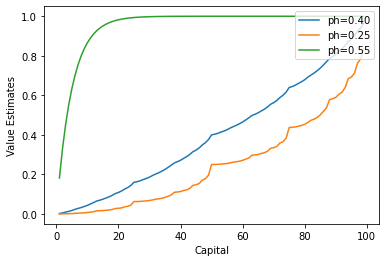

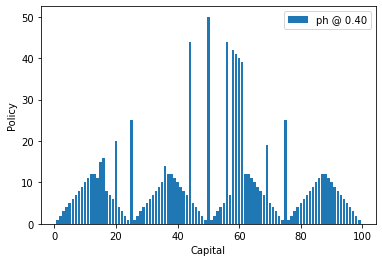

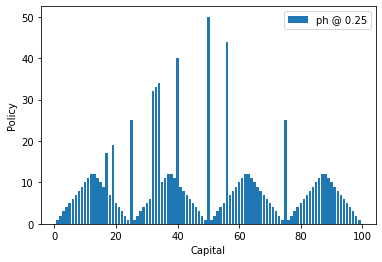

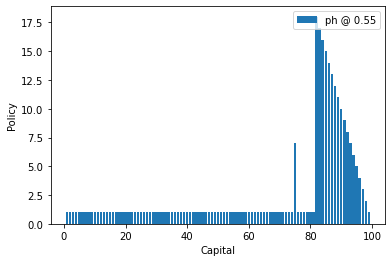

In [40]:
if __name__ == "__main__":
    [V1, pi1] = execute(ph=0.4)
    [V2, pi2] = execute(ph=0.25)
    [V3, pi3] = execute(ph=0.55)
    S = np.linspace(1, 99, num=99, endpoint=True)
    plt.figure()
    plt.plot(S, V1, label="ph=0.40")
    plt.plot(S, V2, label="ph=0.25")
    plt.plot(S, V3, label="ph=0.55")
    plt.legend(loc="upper right")
    plt.ylabel('Value Estimates')
    plt.xlabel('Capital')
    plt.show()
    plt.figure()
    plt.bar(S, pi1, label="ph @ 0.40")
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.legend(loc="upper right")
    plt.show()
    plt.figure()
    plt.bar(S, pi2, label="ph @ 0.25")
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.legend(loc="upper right")
    plt.show()
    plt.figure()
    plt.bar(S, pi3, label="ph @ 0.55")
    plt.xlabel('Capital')
    plt.ylabel('Policy')
    plt.legend(loc="upper right")
    plt.show()